# Clustering Project - Bendebbache Mohammed Yasser
in this project i'm working on a dataset that conserns diabetic people, it shows the features of the ones who has diabetes or not. and basing on those features we're going to apply some various clustering technics and compare them at the end to see which one is better

In [195]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import classification_report
%matplotlib inline

## Checking for missing data and Correcting it:

In [196]:
#reading dataset
df = pd.read_csv('pima-data.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [197]:
print('checking for missing data :\n{}'.format(df.isnull().sum()))
print(df.shape)

checking for missing data :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
(768, 9)


our dataset has 768 rows and 9 features and we can see the it doesnt have any null values, but actually this doesn't mean that it is clean yet because some of the features like BMI,Glucose,BloodPresssure,SkinThicness,Insulin can't be 0 in a human body so we have to remove them from the dataset because we dont have a way to get the correct information of the person

In [198]:
print ("Body Mass Index :",df[(df.BMI == 0)].shape[0])
print ("Glucose :",df[(df.Glucose == 0)].shape[0])
print ("Blood Pressure :",df[(df.BloodPressure == 0)].shape[0])
print ("Skin Thickness :",df[(df.SkinThickness == 0)].shape[0])
print ("Insulin :",df[(df.Insulin == 0)].shape[0])

Body Mass Index : 11
Glucose : 5
Blood Pressure : 35
Skin Thickness : 227
Insulin : 374


as you can see above some of those features has the 0  values , so now we have to remove the conserning rows from the dataset

In [199]:
df = df[df.BMI != 0]
df = df[df.Glucose != 0]
df = df[df.BloodPressure != 0]
df = df[df.SkinThickness != 0]
df = df[df.Insulin != 0]
df = df.reset_index(drop=True)

In [200]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
5,5,166,72,19,175,25.8,0.587,51,1
6,0,118,84,47,230,45.8,0.551,31,1
7,1,103,30,38,83,43.3,0.183,33,0
8,1,115,70,30,96,34.6,0.529,32,1
9,3,126,88,41,235,39.3,0.704,27,0


In [201]:
print(df.shape)

(392, 9)


after cleaning the dataset we have 392 rows now

## K-means : 
getting minimal number of clusters using elbow method

In [202]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
    distortions.append(kmeanModel.inertia_)

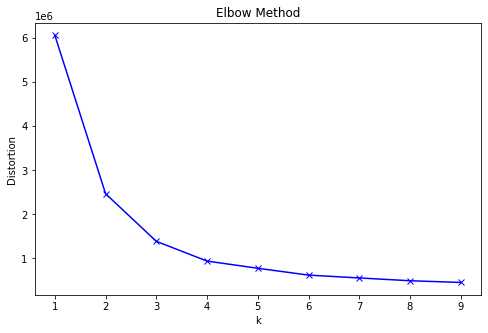

In [203]:
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

the optimal k value is 4 in this case but in this dataset we only want 2 clusters, one for people who has diebetes

and the other one for the normal people. so i'm gonna use the number 2

In [204]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

KMeans(n_clusters=2)

Text(0.04, 0.5, 'Insulin')

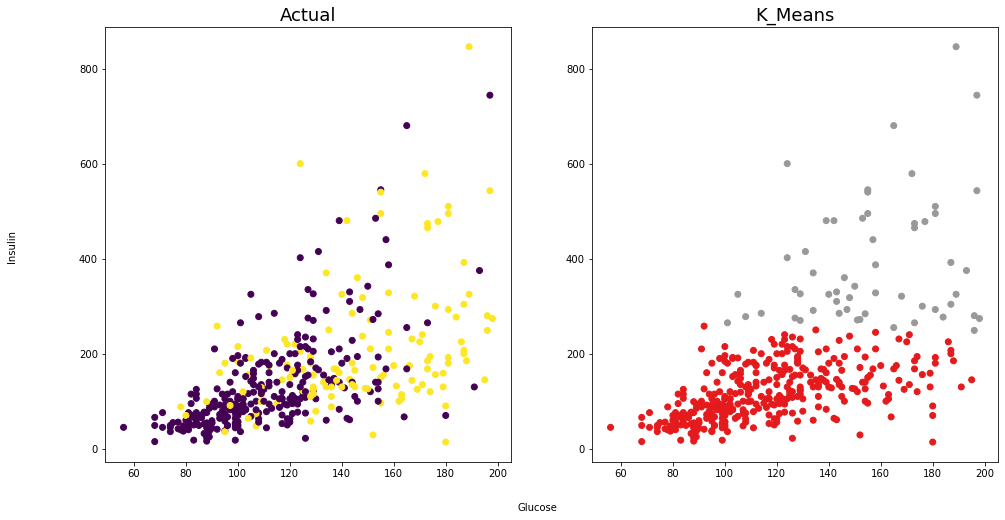

In [205]:
df['k_means']=kmeanModel.predict(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df['Glucose'], df['Insulin'], c=df['Outcome'])
axes[1].scatter(df['Glucose'], df['Insulin'], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)
fig.text(0.5, 0.04, 'Glucose', ha='center')
fig.text(0.04, 0.5, 'Insulin', va='center', rotation='vertical')


Here we notice that when the insulin value is greater than 250, kmeans clustering consider

the person with that value as a fine person.

now lets evaluate k-means using confusion matrix and accuracy score

## Evluation of K-means

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       262
           1       0.52      0.22      0.31       130

    accuracy                           0.67       392
   macro avg       0.61      0.56      0.55       392
weighted avg       0.64      0.67      0.63       392

0.673469387755102


array([[235,  27],
       [101,  29]], dtype=int64)

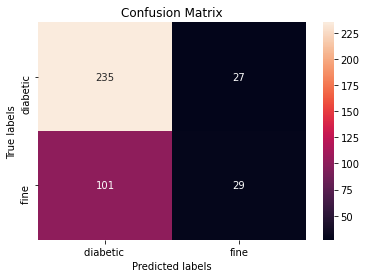

In [206]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_true = df['Outcome']
y_pred = df['k_means']
cm =confusion_matrix(y_true, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g');#annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['diabetic ', 'fine']); ax.yaxis.set_ticklabels(['diabetic', 'fine ']);
print(classification_report(y_true, y_pred))
kmeans_accuracy_score = accuracy_score(y_true, y_pred)
print(kmeans_accuracy_score)
cm

In [207]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,k_means
0,1,89,66,23,94,28.1,0.167,21,0,0
1,0,137,40,35,168,43.1,2.288,33,1,0
2,3,78,50,32,88,31.0,0.248,26,1,0
3,2,197,70,45,543,30.5,0.158,53,1,1
4,1,189,60,23,846,30.1,0.398,59,1,1
...,...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,1,1
388,1,128,88,39,110,36.5,1.057,37,1,0
389,2,88,58,26,16,28.4,0.766,22,0,0
390,10,101,76,48,180,32.9,0.171,63,0,0


here i'm just showing the accuracy score and confusion matrix for evaluting k-means, i will keep doing this even for next technics. and if you see above, i am just showing that i'm storing the result of each technic inside the dataset itself

## Hierarchical clustering (Agglomerative Clustering) :
now we are going to apply the hierarchical clustering technique which is called "Agglomerative Clustering" on the same dataset and see the results

In [212]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
df['Hierarchiacal_clustering'] = cluster.fit_predict(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])


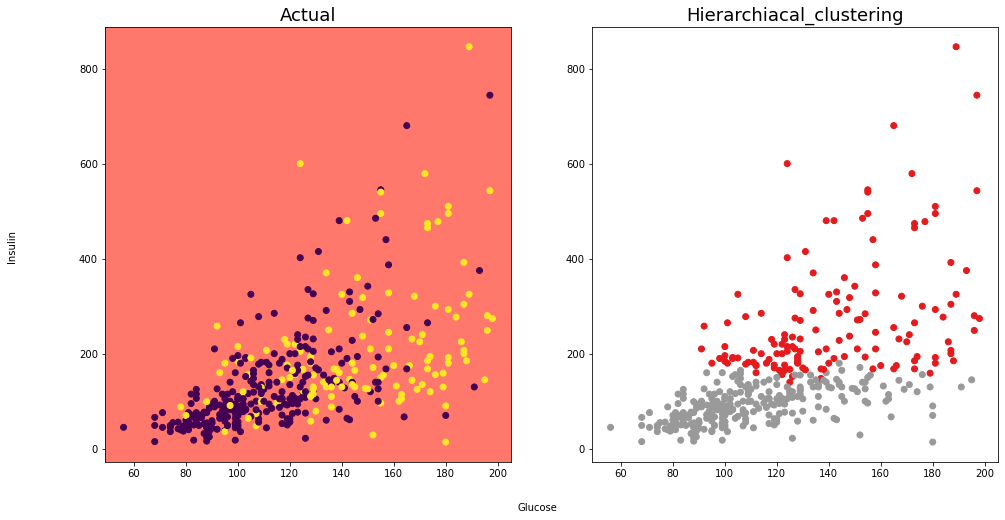

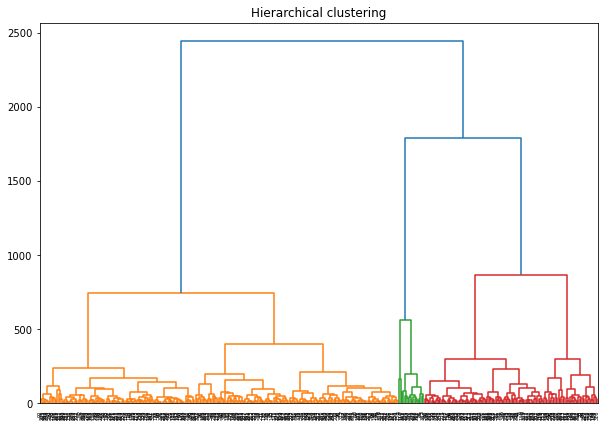

In [213]:
import scipy.cluster.hierarchy as shc


fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df['Glucose'], df['Insulin'], c=df['Outcome'])
axes[1].scatter(df['Glucose'], df['Insulin'], c=df['Hierarchiacal_clustering'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Hierarchiacal_clustering', fontsize=18)
axes[0].set_facecolor((1.0, 0.47, 0.42))
fig.text(0.5, 0.04, 'Glucose', ha='center')
fig.text(0.04, 0.5, 'Insulin', va='center', rotation='vertical')

plt.figure(figsize=(10, 7))
plt.title("Hierarchical clustering")
dend = shc.dendrogram(shc.linkage(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']], method='ward'))

## Evaluation of Hierarchical clustering :

              precision    recall  f1-score   support

           0       0.50      0.27      0.35       262
           1       0.24      0.46      0.31       130

    accuracy                           0.33       392
   macro avg       0.37      0.36      0.33       392
weighted avg       0.41      0.33      0.34       392

0.33163265306122447


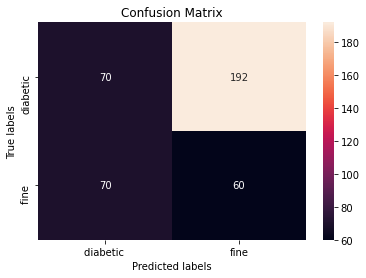

In [216]:
y_true = df['Outcome']
y_pred = df['Hierarchiacal_clustering']
cm =confusion_matrix(y_true, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['diabetic ', 'fine']); ax.yaxis.set_ticklabels(['diabetic', 'fine ']);
print(classification_report(y_true, y_pred))
hierarchiacal_clustering_score = accuracy_score(y_true, y_pred)
print(hierarchiacal_clustering_score)

In [217]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,k_means,Hierarchiacal_clustering
0,1,89,66,23,94,28.1,0.167,21,0,0,1
1,0,137,40,35,168,43.1,2.288,33,1,0,0
2,3,78,50,32,88,31.0,0.248,26,1,0,1
3,2,197,70,45,543,30.5,0.158,53,1,1,0
4,1,189,60,23,846,30.1,0.398,59,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,1,1,0
388,1,128,88,39,110,36.5,1.057,37,1,0,1
389,2,88,58,26,16,28.4,0.766,22,0,0,1
390,10,101,76,48,180,32.9,0.171,63,0,0,0


## AffinityPropagation :

In [218]:

from sklearn.cluster import AffinityPropagation
afprop = AffinityPropagation(max_iter=250, random_state = None)
afprop.fit(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
df['Affinity_Propagation'] = afprop.predict(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

Text(0.04, 0.5, 'Insulin')

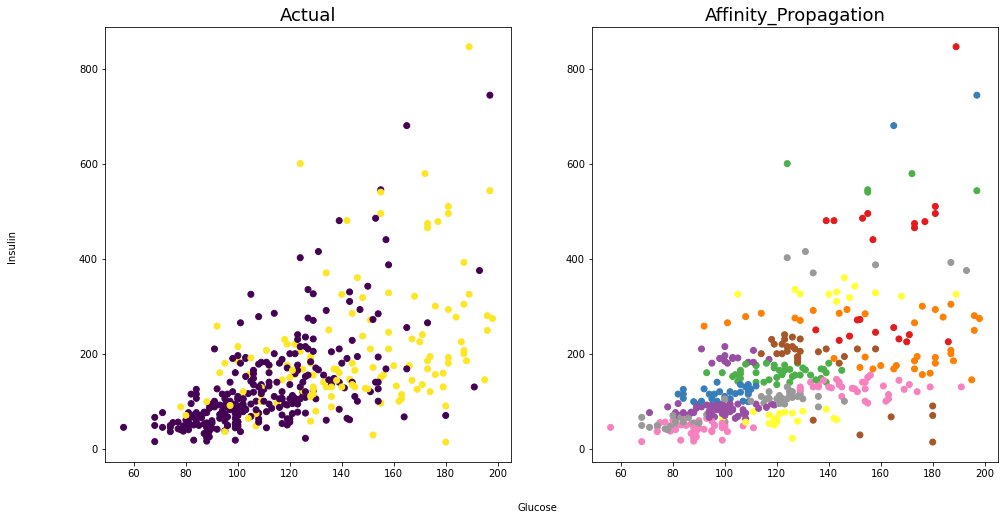

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df['Glucose'], df['Insulin'], c=df['Outcome'])
axes[1].scatter(df['Glucose'], df['Insulin'], c=df['Affinity_Propagation'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Affinity_Propagation', fontsize=18)
fig.text(0.5, 0.04, 'Glucose', ha='center')
fig.text(0.04, 0.5, 'Insulin', va='center', rotation='vertical')

In [220]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,k_means,Hierarchiacal_clustering,Affinity_Propagation
0,1,89,66,23,94,28.1,0.167,21,0,0,1,7
1,0,137,40,35,168,43.1,2.288,33,1,0,0,6
2,3,78,50,32,88,31.0,0.248,26,1,0,1,7
3,2,197,70,45,543,30.5,0.158,53,1,1,0,5
4,1,189,60,23,846,30.1,0.398,59,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,1,1,0,2
388,1,128,88,39,110,36.5,1.057,37,1,0,1,20
389,2,88,58,26,16,28.4,0.766,22,0,0,1,16
390,10,101,76,48,180,32.9,0.171,63,0,0,0,8


here i got more than 2 clusters so i'm not going to evaluate it with the other methods who gave 2 clusters

## Gaussian Mixture Models Clustering :

In [221]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 2,
                              covariance_type = 'full')
gmm.fit(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
print(gmm.bic(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]))
df['gmm'] = gmm.predict(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

21595.936171995


Text(0.04, 0.5, 'Insulin')

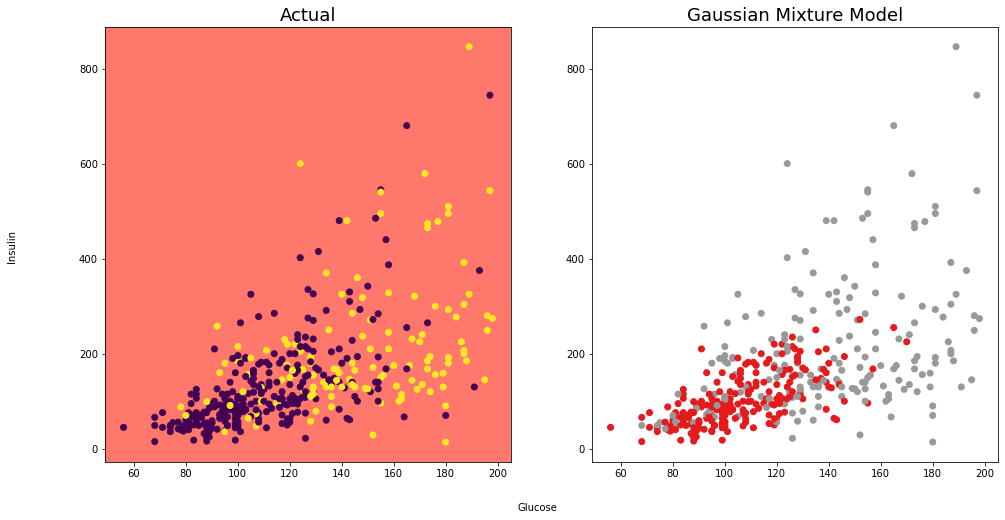

In [222]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df['Glucose'], df['Insulin'], c=df['Outcome'])
axes[1].scatter(df['Glucose'], df['Insulin'], c=df['gmm'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Gaussian Mixture Model', fontsize=18)
axes[0].set_facecolor((1.0, 0.47, 0.42))
fig.text(0.5, 0.04, 'Glucose', ha='center')
fig.text(0.04, 0.5, 'Insulin', va='center', rotation='vertical')

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       262
           1       0.55      0.79      0.65       130

    accuracy                           0.71       392
   macro avg       0.71      0.73      0.70       392
weighted avg       0.76      0.71      0.72       392

0.7142857142857143


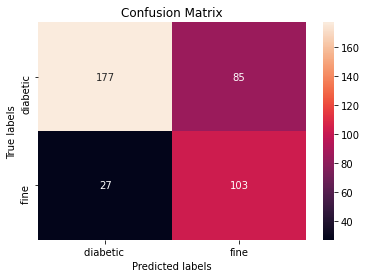

In [223]:
y_true = df['Outcome']
y_pred = df['gmm']
cm =confusion_matrix(y_true, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g');

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['diabetic ', 'fine']); ax.yaxis.set_ticklabels(['diabetic', 'fine ']);
print(classification_report(y_true, y_pred))
gmm_score = accuracy_score(y_true, y_pred)
print(gmm_score)

In [224]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,k_means,Hierarchiacal_clustering,Affinity_Propagation,gmm
0,1,89,66,23,94,28.1,0.167,21,0,0,1,7,0
1,0,137,40,35,168,43.1,2.288,33,1,0,0,6,1
2,3,78,50,32,88,31.0,0.248,26,1,0,1,7,0
3,2,197,70,45,543,30.5,0.158,53,1,1,0,5,1
4,1,189,60,23,846,30.1,0.398,59,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,1,1,0,2,1
388,1,128,88,39,110,36.5,1.057,37,1,0,1,20,1
389,2,88,58,26,16,28.4,0.766,22,0,0,1,16,0
390,10,101,76,48,180,32.9,0.171,63,0,0,0,8,1


# Comparing Scores:
after apply the technics above and getting their scores, now it's time to campare all of them together

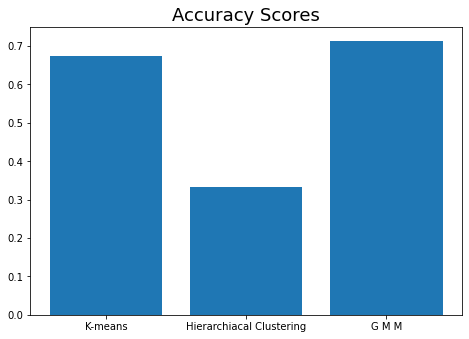

In [225]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Accuracy Scores', fontsize=18)
langs = ['K-means', 'Hierarchiacal Clustering', 'G M M']
scores = [kmeans_accuracy_score,hierarchiacal_clustering_score,gmm_score]
ax.bar(langs,scores)
plt.show()

between these clustering technics we notice that GaussianMixture Models clustering is the one who gave best results

# Classification and Size reduction:

here i just applied PCA Principal component analysis which is a Linear dimensionality size reduction technique and i got these pricipal componants below

In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
pcadf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

pcadf

,pc1,pc2
0,-66.928360,-25.231642
1,13.960045,8.877851
2,-74.456869,-35.608966
3,394.264424,14.306557
4,691.796080,-43.442608
...,...,...
387,359.018424,3.242528
388,-44.118148,16.291291
389,-144.105151,-14.530242
390,21.268069,-18.322879


**applying Logistic Regression for classification and comparing training accuracy with testing one :**

In [235]:
from sklearn.model_selection import train_test_split
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.65,test_size=0.35, random_state=0)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('training accuracy : {}'.format(logreg.score(X_train, y_train)))
print('testig accuracy : {}'.format(logreg.score(X_test, y_test)))

training accuracy : 0.8070866141732284
testig accuracy : 0.7463768115942029
